In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Linear Regressions
## 1. Batch Gradient Descent
## 2. Stochastic Gradient Descent
## 3. Normal Equation
## 4. Locally weighted regression

In [ ]:
# Generate sample data
X = 100 * np.random.rand(100, 1) # Features
Y = 40 + 3 * X + 40 * np.random.randn(100, 1) # Target (linear relationship + noise)

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Original Data')
plt.title('Synthetic Data for Linear Regression')
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.grid(True)
plt.legend()
plt.show()

print("Generated X (first 5 rows):\n", X[:5])
print("Generated Y (first 5 rows):\n", Y[:5])

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Linear Regression
- $\theta$: parameters
- $\theta_j$ = jth parameters → $ℝ^{n+1}$ when n = # input
- m = # trainning examples
- x = inputs / features
- y = output / target
- $(x, y)$ = training examples
- $(x^{(i)}, y^{(i)} )$ = ith training examples

**Hypothesis Function**:  $h(x) = \theta_0+\theta_1x_1+\theta_2x_2+...$

**Cost Function**: $J(\theta) =\frac12\sum_{i=1}^m(h_\theta(x^i)-y^i)^2$

GOAL : choose Parameters s.t. $h(x) \approx y$ for target datas.

→ minimize Cost Function → gradient descent

## Batch Gradient Descent

(calcutating can be slow with huge dataset)

- start with random $\theta$ → keep changing $\theta$ to reduce $J(\theta)$

- Find partial derivative of $J(\theta)$:   $\frac{\delta}{\delta \theta_j}J(\theta) = (h_\theta(x)-y)⋅ x_j$

- $\theta_j ≔  \theta_j - \alpha (h_\theta(x)-y)⋅x_j$    ($\alpha$ as learning weight)

Repeat until convergence → find local optimal

In [ ]:
def linear_regression_batch(X_train, Y_train, alpha = 0.0001, epoch = 100):
  intercept = np.random.rand() #theta 0
  coefficient = np.random.rand(1,1) #theta 1

  # Fit Model
  for i in range(epoch):
    error = intercept + coefficient * X_train - Y_train
    intercept = intercept - alpha * np.mean(error)
    coefficient = coefficient - alpha * np.mean(error) * X_train
    print(f"Epoch {i+1}: Intercept = {intercept:.2f}, Coefficient = {coefficient[0][0]:.2f}")

  print(f"Intercept (theta_0): {intercept:.2f}")
  print(f"Coefficient (theta_1): {coefficient[0][0]:.2f}")
  return intercept, coefficient

intercept, coefficient =  linear_regression_batch(X_train, Y_train)

## Stochastic gradient descent
update after use one data → memory efficient

Descending makes some noises but eventually goes to local minimum

In [ ]:
def linear_regression_stochastic(X_train, Y_train, alpha = 0.001, epoch = 100):
  alpha = 0.0001
  epoch = 100
  intercept = np.random.rand() #theta 0
  coefficient = np.random.rand() #theta 1

  # Fit Model
  for i in range(epoch):
    for j in range(len(X_train)):
      error = intercept + coefficient * X_train[j].item() - Y_train[j].item()
      intercept = intercept - alpha * error
      coefficient = coefficient - alpha * error * X_train[j].item()
    print(f"Epoch {i+1}: Intercept = {intercept:.2f}, Coefficient = {coefficient:.2f}")

  print(f"Intercept (theta_0): {intercept:.2f}")
  print(f"Coefficient (theta_1): {coefficient:.2f}")
  return intercept, coefficient

intercept, coefficient = linear_regression_stochastic(X_train, Y_train)

##Normal Equation
$\theta = (x^Tx)^{-1}x^Ty$

Derivation:
1. $x\theta = \text{(column vector)}x^{(i)^T}\theta =\text{(column vector)} h(x)$

2. $J(\theta) =\frac12\sum_{i=1}^m(h_\theta(x^i)-y^i)^2 = \frac12\sum_{i=1}^m(x\theta -y)^2$ (Matrix)

3. $\frac12\sum_{i=1}^m(x\theta -y)^2 = \frac12(x\theta - y)^T(x\theta - y)$

4. $\nabla_\theta \frac12(x\theta - y)^T(x\theta - y) = (x^Tx)^{-1}x^Ty$


### +) Linear algebra

- Derivative of Matrix function → partial derivative of each element of matrix

- trace of A → sum of diagonal entries, tr(A)

- $trA = trA^T$

- $trAB = trBA$,         $trABC = trCAB$

- $f(A) = trAB$  → $\nabla _A f(A) = B^T$

- $\nabla_A trAA^TC = CA+C^TA$

- $\sum_{i=1,\ j=i}^{i=n,\ j=m}(a_{ij})^2 = A^TA$

In [ ]:
def linear_regression_normal_equation(X_train, Y_train):
  # Add a bias (intercept) term to X_train
  X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]

  # Normal Equation
  theta_normal = np.linalg.inv(X_b_train.T @ X_b_train) @ X_b_train.T @ Y_train

  # Extract intercept and coefficient
  intercept_normal = theta_normal[0][0]
  coefficient_normal = theta_normal[1][0]

  print(f"Intercept (theta_0) from Normal Equation: {intercept_normal:.2f}")
  print(f"Coefficient (theta_1) from Normal Equation: {coefficient_normal:.2f}")
  return intercept_normal, coefficient_normal

intercept, coefficient = linear_regression_normal_equation(X_train, Y_train)

In [ ]:
#Estimation

def gradient_model_estimation(intercept, coefficient)
  #Make Predictions
  Y_pred = intercept + coefficient * X_test

  #Evaluate model
  mse = mean_squared_error(Y_test, Y_pred)
  r2 = r2_score(Y_test, Y_pred)
  print(f"Mean Squared Error (MSE): {mse:.2f}")
  print(f"R-squared (R2): {r2:.2f}")

#gradient_model_estimation(intercept, coefficient)

+) LinearRegression model from scikit

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, Y_train)     # It actually uses Singular Value Decomposition (SVD)

# The intercept (theta_0)
print(f"Intercept (theta_0): {model.intercept_[0]:.2f}")
# The coefficient (theta_1)
print(f"Coefficient (theta_1): {model.coef_[0][0]:.2f}")

In [ ]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

In [ ]:
# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Test Data')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.grid(True)
plt.legend()
plt.show()

##Locally Weighted Regression

- Non-parametric learning algorithm
- $J(\theta) = \sum_{i=1}^{m}w^{(i)}(y^{(i)}-\theta^T x^{(i)})^2$
- where $w^i$ is weighting fuction, which returns about 1 if $x^i$ is close to target  $x$ or about 0
- $w^i = \exp(-\frac{{(x^{(i)}-x)}^2}{2\tau^2})$ ($\tau$ = bandwidth)
-  $|x^{(i)} - x|$is small, i.e. can cover a lot of Xs within bandwidth (goes to 1)
-   $|x^{(i)} - x|$is large i.e. can't cover a lot of Xs within bandwidth (goes to 0)  

### Non-parametric learning algorithm

- parametric learning algorithm: Fit fixed set of parameters to data
- Non-parametric learning algorithm: Amount of data/parameters **grows** (linearly) with size of data








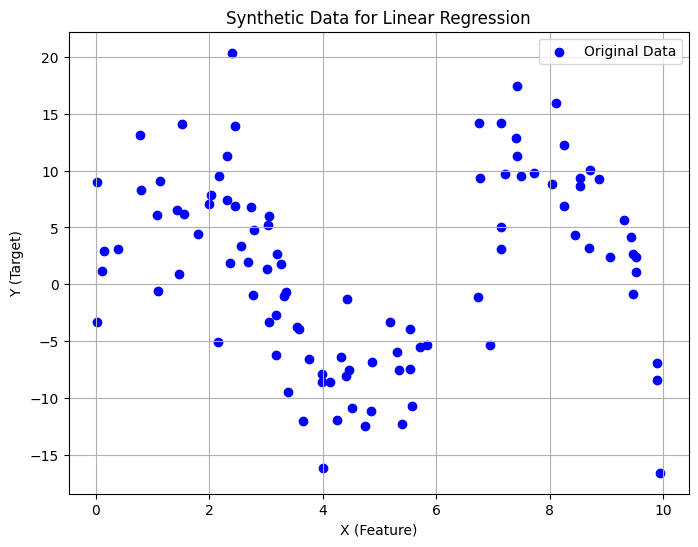

Generated X (first 5 rows):
 [[3.32007431]
 [1.80445792]
 [2.45544511]
 [9.94627752]
 [3.58297837]]
Generated Y (first 5 rows):
 [[ -0.99750783]
 [  4.46127981]
 [ 13.88747807]
 [-16.5721007 ]
 [ -3.91646414]]


In [3]:
# Generate sample data
function = lambda x: np.sin(x)
X = 10 * np.random.rand(100, 1) # Features
Y =  10 * function(X) + 5 * np.random.randn(100, 1) # Target (linear relationship + noise)

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Original Data')
plt.title('Synthetic Data for Linear Regression')
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.grid(True)
plt.legend()
plt.show()

print("Generated X (first 5 rows):\n", X[:5])
print("Generated Y (first 5 rows):\n", Y[:5])

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

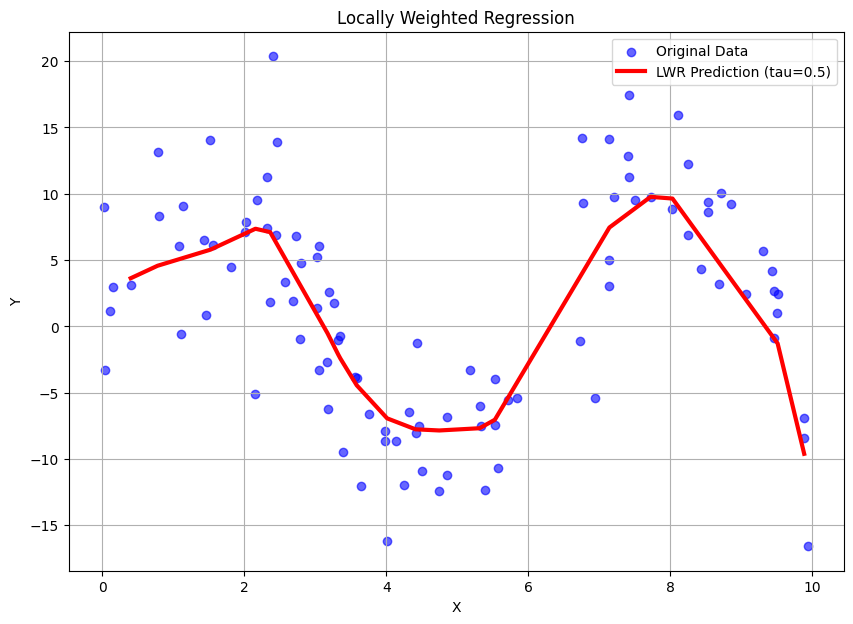

In [4]:
def gaussian_kernel(x_i, x, tau):
    return np.exp(-np.sum((x_i - x)**2) / (2 * tau**2))

def locally_weighted_regression(X_train, Y_train, query_point, tau):
    m = X_train.shape[0]
    weights = np.array([gaussian_kernel(X_train[i], query_point, tau) for i in range(m)])

    # Add bias term to X_train for the normal equation
    X_b = np.c_[np.ones((m, 1)), X_train]

    # Create a diagonal weight matrix
    W = np.diag(weights)

    # Calculate theta using the weighted normal equation
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ Y_train

    # Predict for the query point
    prediction = np.array([1, query_point.item()]) @ theta
    return prediction[0]

def predict_lwr(X_train, Y_train, X_test, tau):
    Y_pred = []
    for x_test_point in X_test:
        Y_pred.append(locally_weighted_regression(X_train, Y_train, x_test_point, tau))
    return np.array(Y_pred).reshape(-1, 1)

# Set bandwidth parameter
tau = 0.5

# Make predictions on the test set
Y_pred_lwr = predict_lwr(X_train, Y_train, X_test, tau)

# Sort the test data and predictions for smoother plotting
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
Y_pred_lwr_sorted = Y_pred_lwr[sorted_indices]

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(X, Y, color='blue', label='Original Data', alpha=0.6)
plt.plot(X_test_sorted, Y_pred_lwr_sorted, color='red', linewidth=3, label=f'LWR Prediction (tau={tau})')
plt.title('Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()